In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from pprint import pprint
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from pprint import pprint

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Read in merged dataset 
file = "datasets/merged_lists_032118.csv"

df = pd.read_csv(file)

df.head()

,normal_users,fitness_users
0,sbwTweet,relentless084
1,Allisonlmoore,fitplusllc
2,kristib_t,wchazz
3,omoawo_,QRoberts747
4,KelphelpOG,KeynesJohnny


In [5]:
normal_users = df["normal_users"].tolist()
fitness_users = df["fitness_users"].tolist()
# normal_users
# fitness_users

In [6]:
# Set target twitter accounts 
targetnormal_users = normal_users 
targetfitness_users = fitness_users

# Lists to hold user accounts, tweets, dates, & sentiments
user_acct = []
tweet_txt = []
tweet_dt =[]
# Vader lists 
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [8]:
# Loop through all fitness users 
for target in targetfitness_users:
    
    try:

        # Get tweets for one page for each user (20 tweets)
        public_tweets = api.user_timeline(target)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list 
            user_acct.append(target)
            tweet_txt.append(tweet["text"])
            tweet_dt.append(tweet["created_at"])

            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    except tweepy.error.TweepError:
        print(f'Sorry, {target} not found. Skipping.')
        continue

Sorry, hertattedself not found. Skipping.
Sorry, TaniaAdmans not found. Skipping.
Sorry, DaveWongUK not found. Skipping.
Sorry, iamcai07 not found. Skipping.


### Users possibly changed their username or deleted account since fitness usernames were extracted, see error below
TweepError: [{'code': 34, 'message': 'Sorry, that page does not exist.'}]


In [9]:
# Convert tweet timestamps to datetime objects
converted_timestamps = []
for dt in tweet_dt:
    converted_time = datetime.strptime(dt, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
    
# Confirm length of list 
print(len(converted_timestamps))

9904


### Tweet count: 7465
### Tweet count should have been 10,000 (500 users * 20 tweets); likely changed handle or deleted account.

In [10]:
# Create dataframe for all accounts and tweets
df_fit = pd.DataFrame({"Account":user_acct,
                   "Tweet Text":tweet_txt,
                   "Date":converted_timestamps,
                   "Compound":compound_list,
                   "Positive":positive_list,
                   "Negative":negative_list,
                   "Neutral":neutral_list
                  })
df_fit.head()
# Reorder columns 
df_fit2 = df_fit[['Account', 'Date', 'Tweet Text', 'Compound', 'Positive', 'Neutral', 'Negative']]
df_fit2.head()

,Account,Date,Tweet Text,Compound,Positive,Neutral,Negative
0,relentless084,2018-03-23 04:11:49+00:00,100% facts \n#health #fitness #fit #fitnessmod...,0.0000,0.000,1.000,0.0
1,relentless084,2018-03-23 04:08:39+00:00,Wow 👏🏽👏🏽👏🏽👏🏽✊🏽✊🏽✊🏽✊🏽\n#health #fitness #fit #f...,0.5859,0.297,0.703,0.0
2,relentless084,2018-03-23 03:58:28+00:00,#facts\n#health #fitness #fit #fitnessmodel #f...,0.0000,0.000,1.000,0.0
3,relentless084,2018-03-23 03:54:49+00:00,#MOOD #blackexcellence \n#health #fitness #fit...,0.0000,0.000,1.000,0.0
4,relentless084,2018-03-23 03:51:59+00:00,🔥🔥🔥🔥\n#health #fitness #fit #fitnessmodel #fit...,0.0000,0.000,1.000,0.0


In [14]:
#Save df to csv
df_fit2.to_csv("datasets/fit_tweets.csv",index=False,encoding='utf-8')

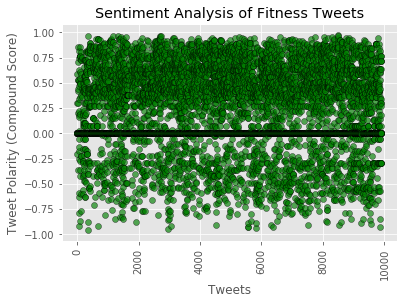

In [13]:
from matplotlib import style
style.use('ggplot')

plt.scatter(range(len(df_fit2["Date"].values)), df_fit2["Compound"], edgecolor="black", color='green', marker="o",
            alpha=0.65, label="fitness users")

# Set title and axis labels
plt.title("Sentiment Analysis of Fitness Tweets")
plt.ylabel("Tweet Polarity (Compound Score)")
plt.xlabel("Tweets")
# plt.legend(bbox_to_anchor=(1, 1),title="Media Sources")
plt.xticks(rotation="vertical")
# plt.xlim(-2,102)
# plt.ylim([-1.05, 1.05])

# Save and show the figure
plt.savefig("SentimentAnalysisScatterplot.png")
plt.show()